In [331]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy.stats import pointbiserialr
import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)

In [332]:
df = pd.read_csv('attrition.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [333]:
df.shape

(1676, 35)

In [334]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EmployeeID,1676.0,1.456796e+06,248748.624383,1025177.0,1235831.75,1464606.0,1667992.00,1886378.0
Age,1676.0,3.686635e+01,9.129126,18.0,30.00,36.0,43.00,60.0
DailyRate,1676.0,8.005579e+02,401.594438,102.0,465.00,796.5,1157.00,1499.0
DistanceFromHome,1676.0,9.221957e+00,8.158118,1.0,2.00,7.0,14.00,29.0
Education,1676.0,2.907518e+00,1.025835,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1676.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,1676.0,2.714797e+00,1.097534,1.0,2.00,3.0,4.00,4.0
HourlyRate,1676.0,6.547017e+01,20.207572,30.0,48.00,65.5,83.00,100.0
JobInvolvement,1676.0,2.724940e+00,0.714121,1.0,2.00,3.0,3.00,4.0
JobLevel,1676.0,2.066826e+00,1.113423,1.0,1.00,2.0,3.00,5.0


In [335]:
for name in df.columns:
    print(name)
    print(df[name].value_counts())

EmployeeID
1313919    1
1604086    1
1788553    1
1638427    1
1828789    1
          ..
1446447    1
1446990    1
1639147    1
1855799    1
1152329    1
Name: EmployeeID, Length: 1676, dtype: int64
Age
35    88
34    85
29    82
31    82
36    81
32    68
38    68
40    64
30    63
33    62
28    59
27    59
37    57
42    52
39    47
26    46
45    45
41    43
46    38
43    37
44    36
50    33
25    30
49    29
24    29
47    28
55    25
53    25
48    23
52    21
54    20
51    20
22    18
23    17
58    17
56    15
21    14
20    13
19    10
59    10
18     8
60     5
57     4
Name: Age, dtype: int64
Attrition
No     1477
Yes     199
Name: Attrition, dtype: int64
BusinessTravel
Travel_Rarely        1184
Travel_Frequently     320
Non-Travel            172
Name: BusinessTravel, dtype: int64
DailyRate
691     7
1329    7
1082    6
444     6
530     6
       ..
1126    1
974     1
905     1
1151    1
1102    1
Name: DailyRate, Length: 886, dtype: int64
Department
Maternity     796
Ca

In [336]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [337]:
# Remove Employee Count and Standard hours - they have no variation
df = df.drop(columns = ['EmployeeID','EmployeeCount', 'StandardHours', 'Over18'], axis = 1)

In [338]:
df['Attrition'].value_counts()

No     1477
Yes     199
Name: Attrition, dtype: int64

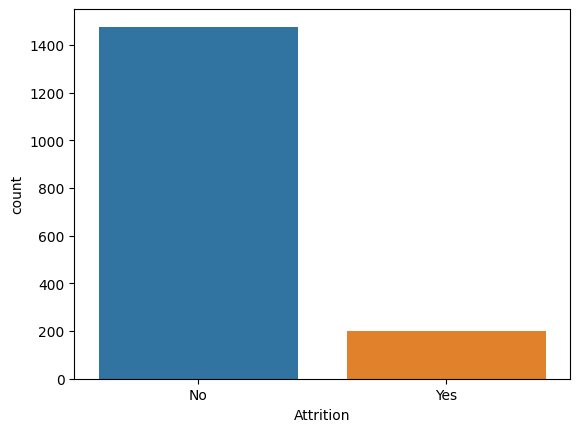

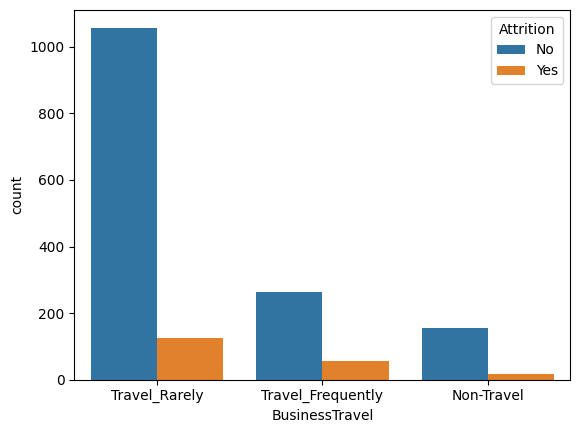

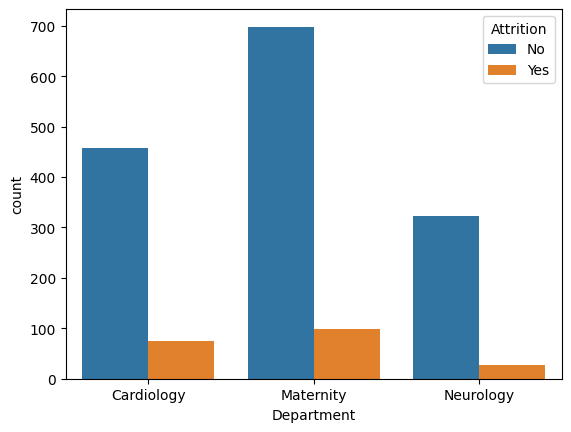

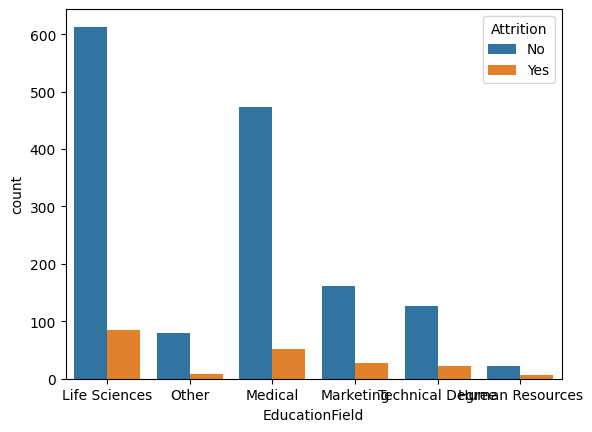

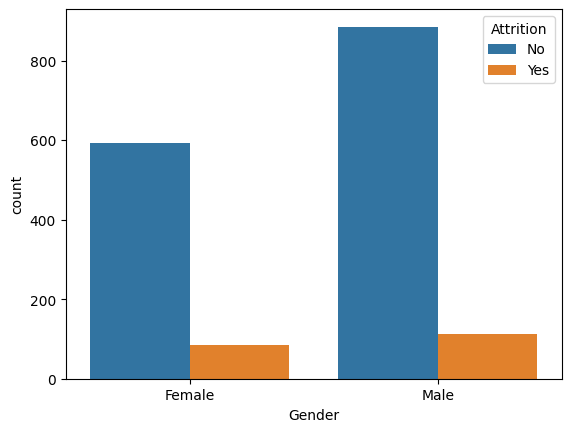

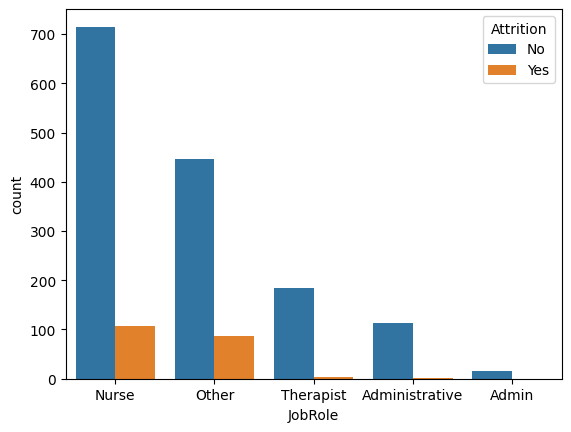

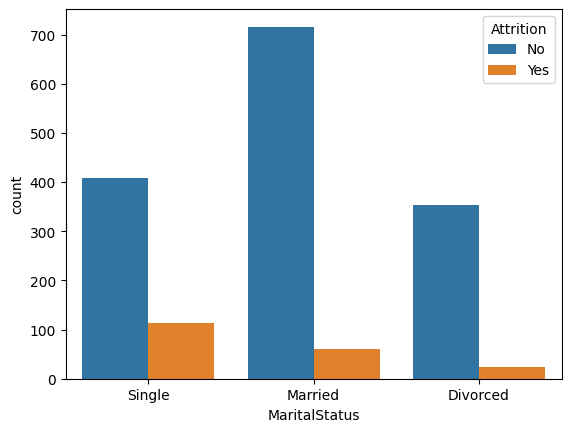

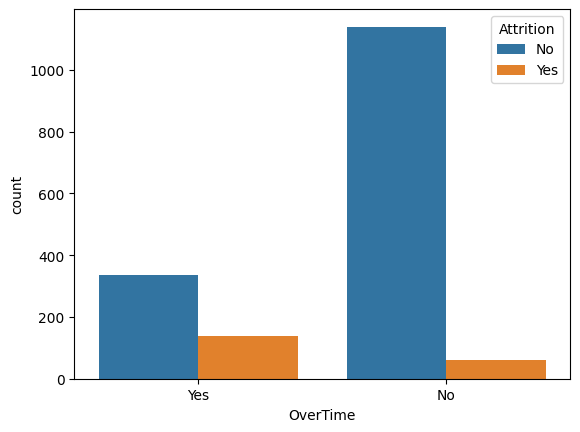

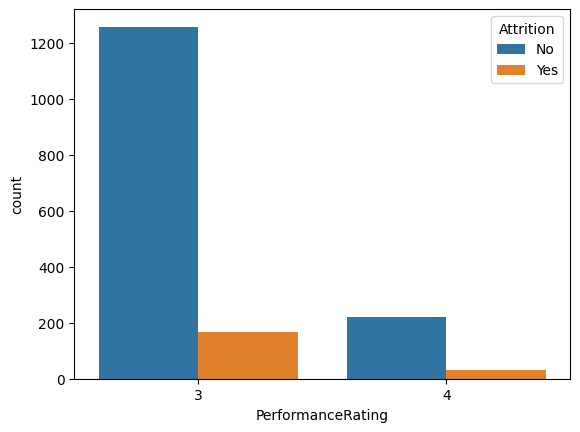

In [339]:
for name in category_cols: 
    if name == 'Attrition':
        sns.countplot(df, x = df[name])
        plt.show()
    else:
        sns.countplot(df, x = df[name], hue = df['Attrition'])
        plt.show()

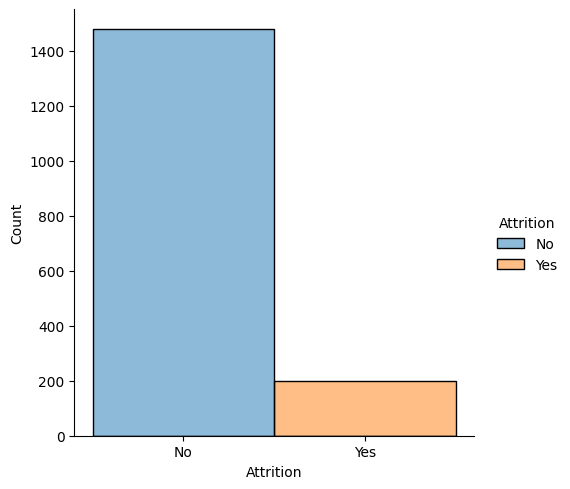

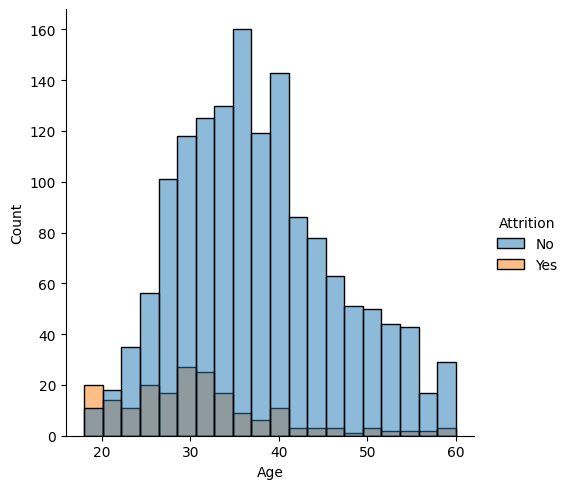

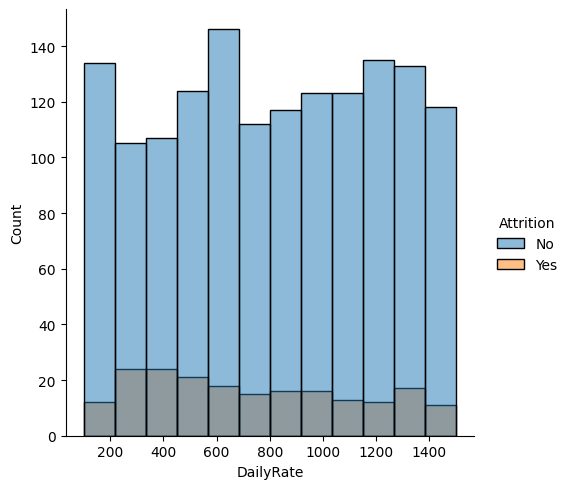

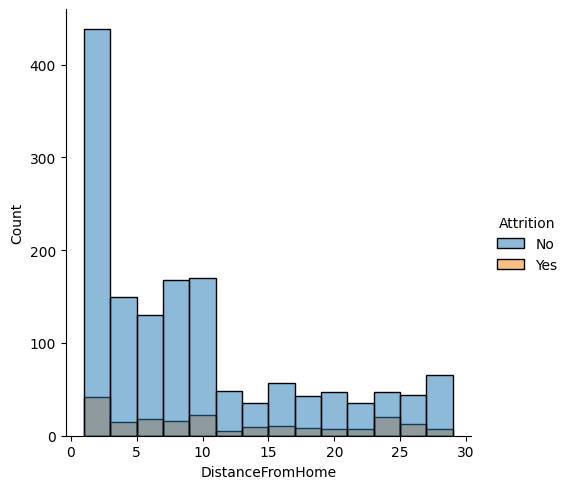

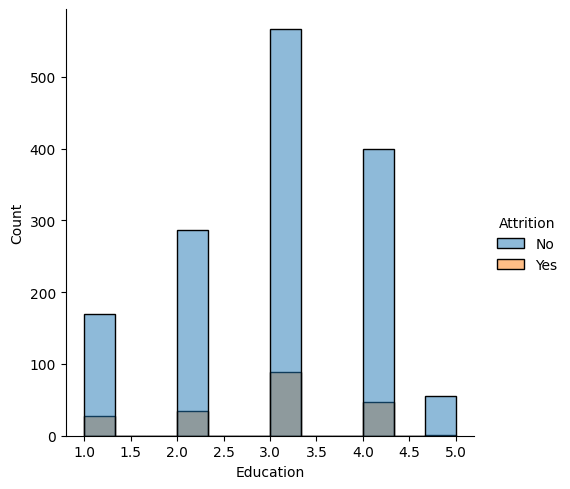

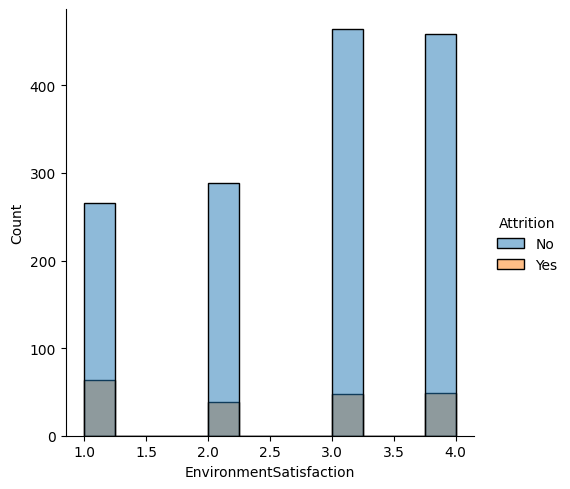

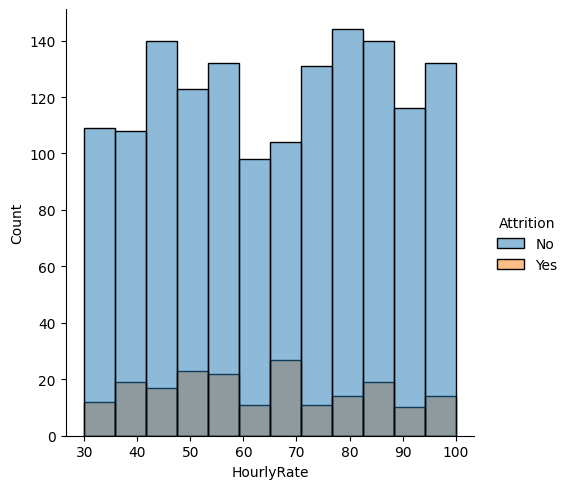

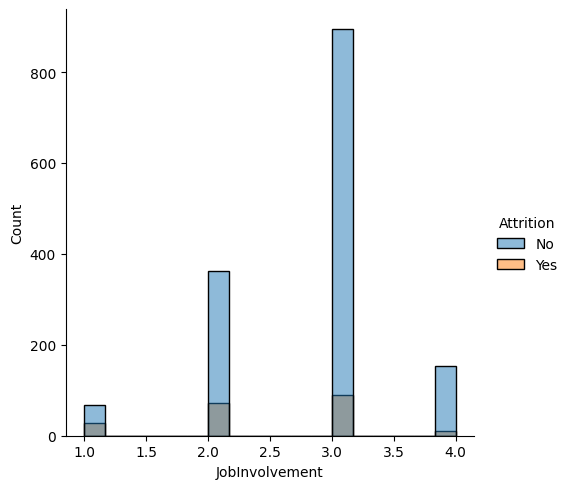

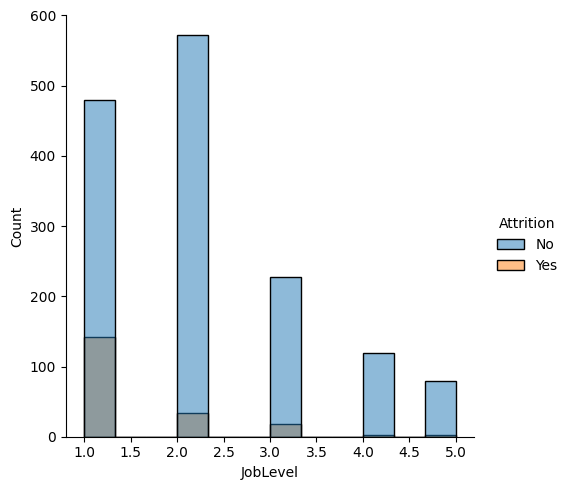

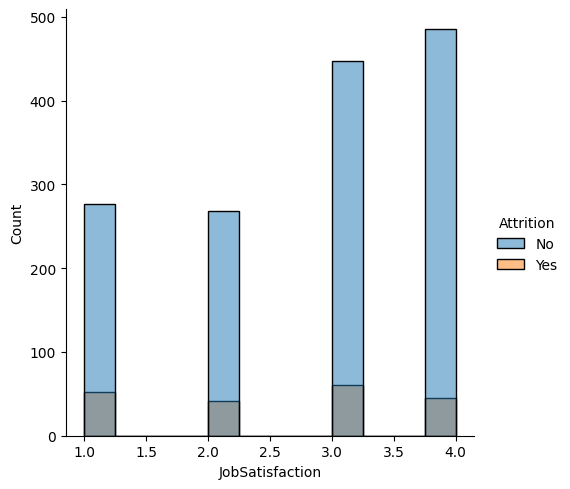

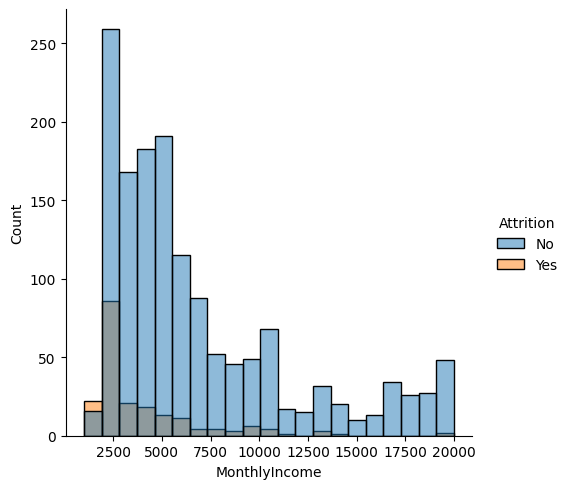

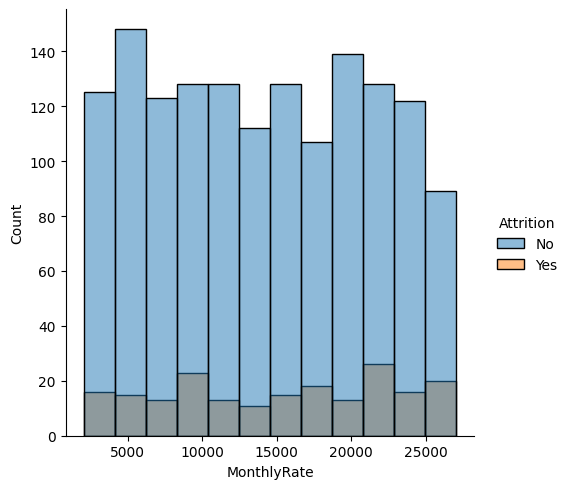

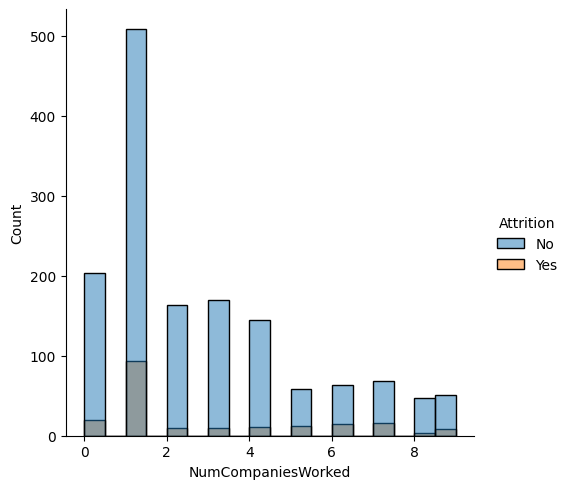

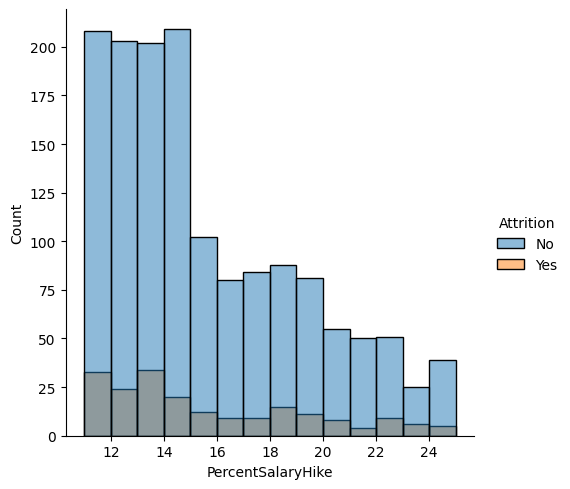

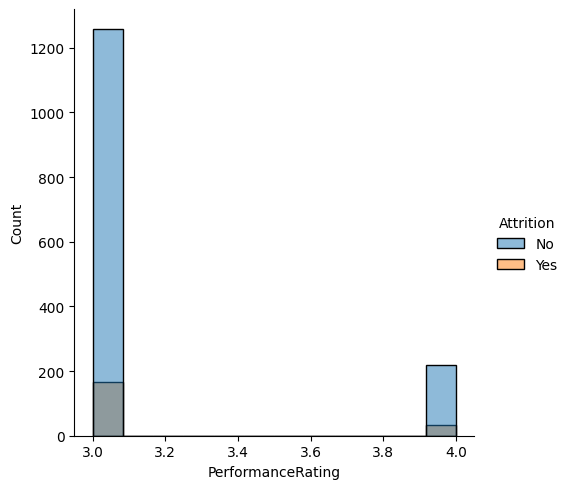

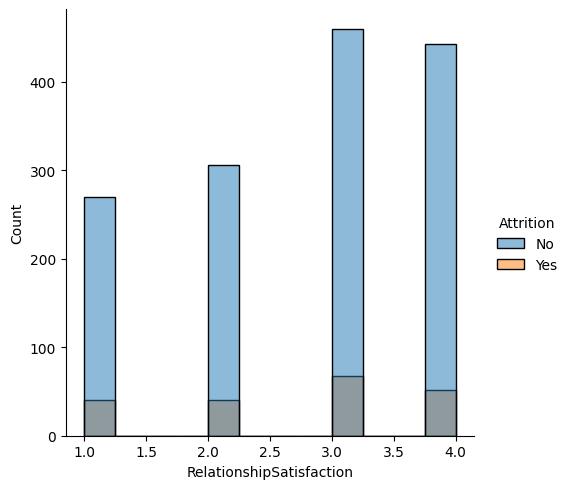

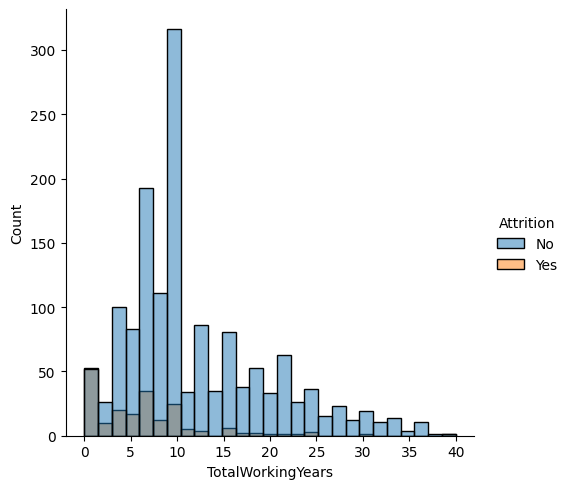

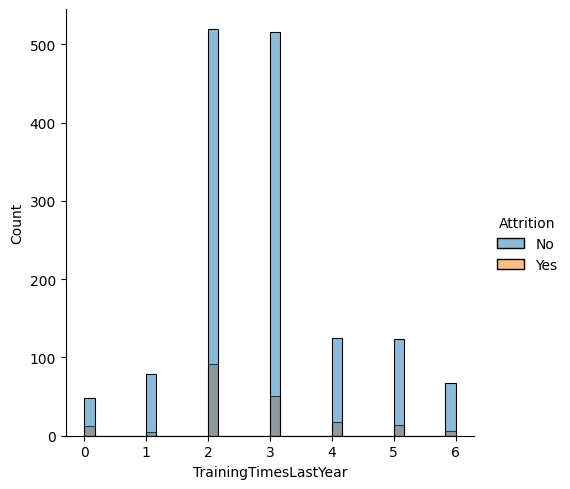

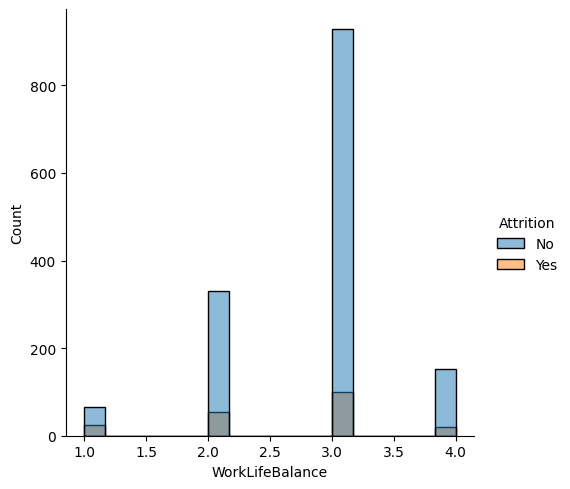

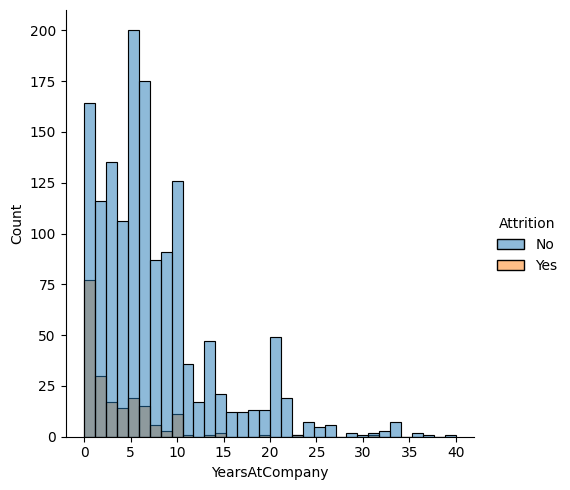

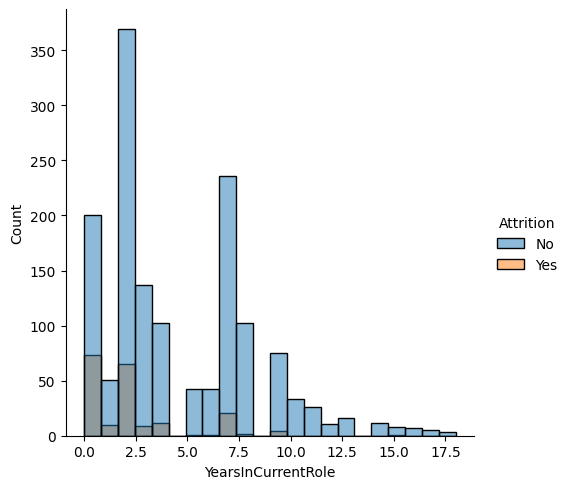

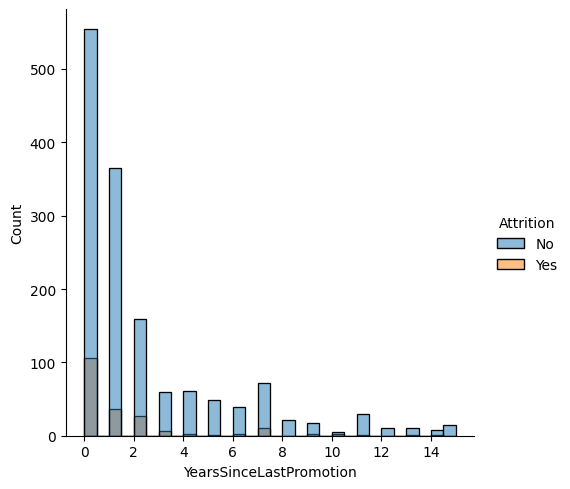

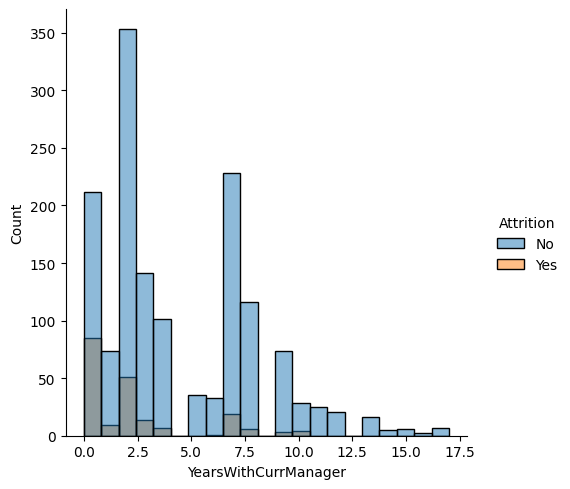

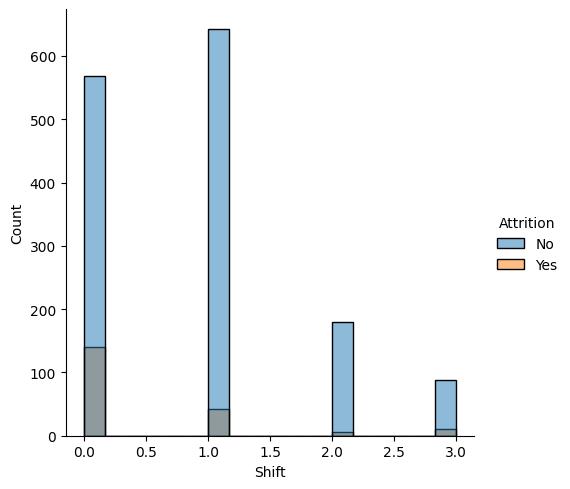

In [340]:
for name in numeric_cols:
    sns.displot(df, x = df[name], hue = 'Attrition')
    plt.show()

In [341]:
df =  pd.get_dummies(df)
df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,1,0,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,1,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,1,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,1,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,1,0,0,0,1,0,1,0


In [342]:
df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_No',
       'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Cardiology', 'Department_Maternity', 'Department_Neurology',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Admin',
       'JobRole_Administrative', 'JobRo

In [344]:
# Drop one of each binary encoded label
df = df.drop(columns = ['Attrition_No', 'OverTime_No', 'Gender_Male',], axis = 1)

In [350]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Gender_Female,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,1,0,0,1,0,0,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,1,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,1,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,1,0,0,0,1,0,0


In [359]:
df.shape

(1676, 46)

In [373]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LogisticRegression



In [404]:
X = df.drop(columns = ['Attrition_Yes'], axis = 1)
y = df['Attrition_Yes']

In [407]:
# Set aside feature names
feature_names = X.columns

In [408]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print( X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1340, 45) (336, 45) (1340,) (336,)


### Null Accuracy = 86%

In [409]:
# Null Accuracy
y_test.value_counts()

0    289
1     47
Name: Attrition_Yes, dtype: int64

In [410]:
289/(289+47) * 100


86.01190476190477

### Preprocessing & Feature Elimination with RFE

Encoding needed for categorical variables has increased the feature count. To improve computational efficiency and identify most impactful variables, recursive feature elimination will be used to identify best features to include. A logistic regression will be used to garner coefficients for variables against the target feature. Accuracy will be tested accross a range of feature counts to identify the best features, and minimum amount of features to include for prediciting attrition of healthcare employees. Results will be visualized and accuracy will be compared against a null accuracy score of the training data to guage performance. Other predictive models might be tested for predicition performance depending on the resulting potential for score improvement using only logistic regression. 

In [465]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [432]:
# Preprocessing - Scale data
scaler = StandardScaler()

# Define the Logistic Regression model
logistic = LogisticRegression(max_iter=1000, random_state=42)

# Preprocess the training data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model accross different number of features to choose best n features and plot results**

In [433]:
# Define the range of features to select
n_features_range = range(1, X_train.shape[1] + 1)

# Initialize lists to store the number of features and corresponding accuracies
n_features_list = []
accuracy_list = []

# Iterate over the range of features to select
for n_features in n_features_range:
    # Initialize RFE with Logistic Regression model
    rfe = RFE(estimator=logistic, n_features_to_select=n_features)
    
    # Fit RFE
    rfe.fit(X_train, y_train)
    
    # Transform the data to include only the selected features
    X_train_selected = rfe.transform(X_train)
    X_test_selected = rfe.transform(X_test)
    
    # Train the Logistic Regression model on the selected features
    final_model = LogisticRegression(max_iter=1000, random_state=42)
    final_model.fit(X_train_selected, y_train)
    
    # Predict on the test data
    y_pred = final_model.predict(X_test_selected)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the number of features and accuracy
    n_features_list.append(n_features)
    accuracy_list.append(accuracy)

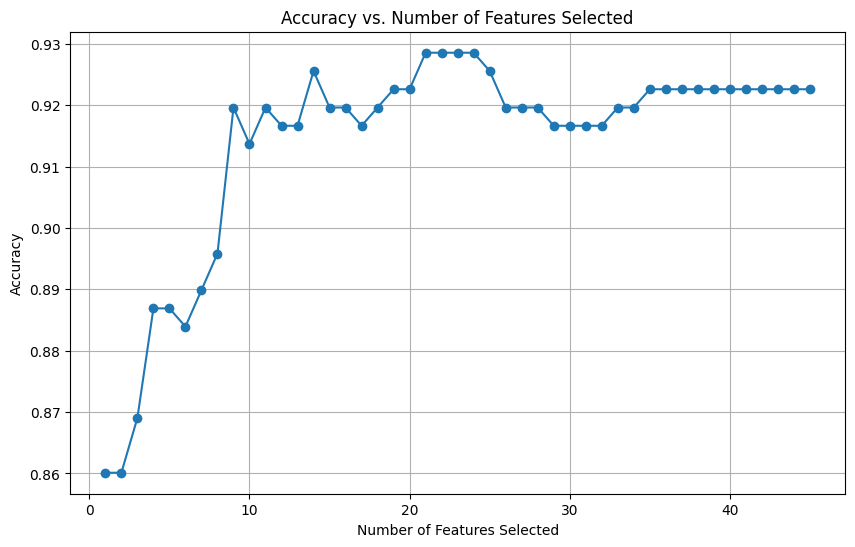

In [434]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_features_list, accuracy_list, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features Selected')
plt.grid(True)
plt.show()

In [448]:
# Initialize RFE with Logistic Regression model
rfe = RFE(estimator=logistic, n_features_to_select=21)

# Fit RFE
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=1000, random_state=42),
    n_features_to_select=21)

In [469]:
# Transform the training and testing data to include only the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Train the final Logistic Regression model on the selected features
final_model = LogisticRegression(max_iter=1000, random_state=42)
final_model.fit(X_train_selected, y_train)

Test Accuracy: 0.9285714285714286


In [471]:
# Predict on the test data
y_pred = final_model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9285714285714286
Confusion Matrix:
[[285   4]
 [ 20  27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       289
           1       0.87      0.57      0.69        47

    accuracy                           0.93       336
   macro avg       0.90      0.78      0.83       336
weighted avg       0.93      0.93      0.92       336



In [450]:
# Get the selected features
selected_features = rfe.support_

selection_table = pd.DataFrame({
    'Feature': feature_names,
    'Selected': selected_features
})

print(selection_table[selection_table['Selected'] ==True])

                             Feature  Selected
0                                Age      True
2                   DistanceFromHome      True
4            EnvironmentSatisfaction      True
6                     JobInvolvement      True
8                    JobSatisfaction      True
9                      MonthlyIncome      True
11                NumCompaniesWorked      True
16                 TotalWorkingYears      True
18                   WorkLifeBalance      True
19                    YearsAtCompany      True
20                YearsInCurrentRole      True
21           YearsSinceLastPromotion      True
24  BusinessTravel_Travel_Frequently      True
26             Department_Cardiology      True
29    EducationField_Human Resources      True
36                     JobRole_Admin      True
37            JobRole_Administrative      True
40                 JobRole_Therapist      True
41            MaritalStatus_Divorced      True
43              MaritalStatus_Single      True
44           

### Remodeling with selected features using Decision Tree Classification

In [472]:
# Initialize SVM model
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the SVM model on the selected features
model.fit(X_train_selected, y_train)

# Predict on the test data
y_pred = model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8898809523809523
Confusion Matrix:
[[283   6]
 [ 31  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       289
           1       0.73      0.34      0.46        47

    accuracy                           0.89       336
   macro avg       0.81      0.66      0.70       336
weighted avg       0.88      0.89      0.87       336



In [473]:
# Check accuracy
accuracy1 = accuracy_score(y_test, y_pred)
accuracy1

0.8898809523809523

### Gradient Boosting Classifier with Gridsearch

In [474]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [475]:
# Define the parameter grid for Gradient Boosting Classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


In [476]:
# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='f1_weighted', verbose=2)

In [478]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}
Accuracy: 0.9077380952380952
Confusion Matrix:
[[284   5]
 [ 26  21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       289
           1       0.81      0.45      0.58        47

    accuracy                           0.91       336
   macro avg       0.86      0.71      0.76       336
weighted avg       0.90      0.91      0.90       336



### MLP Modeling

In [479]:
from sklearn.neural_network import MLPClassifier

In [480]:
# Define the parameter grid for MLP Classifier
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500]
}


In [482]:
# Initialize the MLP Classifier
mlp = MLPClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits


C:\Users\holly\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50), (100, 100)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [200, 500], 'solver': ['adam', 'sgd']},
             scoring='f1_weighted', verbose=2)

In [484]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Accuracy: 0.9226190476190477
Confusion Matrix:
[[283   6]
 [ 20  27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       289
           1       0.82      0.57      0.68        47

    accuracy                           0.92       336
   macro avg       0.88      0.78      0.82       336
weighted avg       0.92      0.92      0.92       336

